<a href="https://colab.research.google.com/github/cs-pub-ro/ML/blob/master/lab/lab1/Laborator_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Învățare Automată
# Grupare. Algoritmul K-Means
### Autori:
* Tudor Berariu - 2016
* George Muraru - 2020

## 1. Scopul laboratorului
Scopul laboratorului ı̂l reprezintă ı̂nțelegerea si implementarea unei metode de ı̂nvățarare nesupervizată pentru grupare (engl. clustering): **algoritmul K-Means**.

Structura documentului este următoarea:
* [Secțiunea 2](#scrollTo=lmsr8fvNKQ5m) prezintă contextul teoretic și formalizează problema ce se dorește rezolvată
* [Secțiunea 3](#scrollTo=Aj8ThCuUKcEB) descrie algoritmul K-Means
* [Secțiunea 4](#scrollTo=j5zthcYxMllG) enumeră câteva dintre limitările algoritmului K-Means și oferă câteva soluții simple pentru depășirea acestora
* [Secțiunea 5](#scrollTo=yWjTUpn9OVY9) descrie câteva metode avansate pentru alegerea acestora.
* [Secțiunea 6](#scrollTo=yWjTUpn9OVY9) descrie e metoda de evaluarea a performanței algoritmului
* [Secțiunea 7](#scrollTo=dDFqbGHmDqtt) conține un setup inițial care trebuie rulat în colab (sau local) pentru instalarea dependențelor
* [Secțiunea 8](#scrollTo=2xk677iNQRvQ) conține cerințele ce trebuie rezolvate ı̂n cadrul laboratorului
* [Secțiunea 9](#scrollTo=muZzrV7uVxXv) conține o descriere a setului de date folosit

## 2. Problema
Una dintre problemele fundamentale ale ı̂nvățării automate o reprezintă identificarea grupurilor (engl. clusters) ı̂ntr-un set de obiecte astfel ı̂ncât obiectele din același grup să prezinte un grad mare de similaritate. Această problemă de ı̂nvățare nesupervizată se numește cluster analysis.

Problema grupării se poate formaliza ı̂n diferite feluri, existând mai multe abordări.
În acest laborator vom rezolva problema grupării bazate pe **centroizi** (engl. centroid-based clustering).

Se consideră un set de date $X = \{x_{1} , . . . x_{N}\}$ ce conține N exemple ı̂ntr-un spațiu D-dimensional. Scopul este partiționarea setului de date ı̂n K grupuri reprezentate prin K vectori prototip (engl. prototype vectors) $c_{k}$ (unde $k \in \{1,.,K\}$) numiți centre sau centroizi (engl. centroids), astfel ı̂ncât distanța totală de la fiecare exemplu la cel mai apropiat centroid să fie minimă:

$$
\begin{equation}
J = \sum_{i=1}^{N}\sum_{k=1}^{K}in_{i,k} \cdot \left\Vert{x_{i} - c_{k}}\right\Vert^2 \tag{1}
\end{equation}
$$

$$
\begin{equation}
in_{i,k} = 
    \begin{cases}
    1, dacă\ k = argmin\left\Vert{x_{i} - c_{l}}\right\Vert\\
    0, altfel
    \end{cases} \tag{2}
\end{equation}
$$

---

## 3. Algoritmul K-Means

<img src="https://drive.google.com/uc?export=view&id=19y4eTM66qJmccoHE6zaRGOPPgkmwRRUu" style="margin-left: 50;" align="right" width="350" height="350"/>

Algoritmul K-Means [[1]](#M67) pornește de la un set de K centroizi aleși aleator din setul de obiecte. Se repetă alternativ următorii doi pași până când 
algoritmul converge:
1. Se parcurg toate obiectele din setul de date și fiecare dintre acestea este alocat grupului corespunzator celui mai apropiat centroid
2. Se recalculează centroidul fiecarui grup

Algoritmul converge atunci când în urma unei iterații nu s-a modificat componența grupurilor.

Pentru a înțelege de ce algoritmul K-Means găsește un minim al expresiei J (Formula 1), trebuie observat că cei doi pași optimizează succesiv parametrii $in_{i,k}$ și $c_{k}$. 
1. Fixând $c_{k}$, se recalculează $in_{i,k}$ conform ecuației 2.
2. Fixând $in_{i,k}$, un minim al expresiei $J$ se găsește în punctul în care derivata este zero: 
$$
\begin{equation}
\sum_{i=1}^{N}in_{i,k}(x_{i} - c_{k}) = 0
\end{equation}
$$



![Alg K-Means](https://drive.google.com/uc?export=view&id=1V2m8cYakqLohh_mipzup-vzQlWHysGFE)

## 4. Limitări ale algoritmului K-Means
Algoritmul K-Means prezintă următoarele limitări importante:
1. Numărul de grupuri K trebuie cunoscut a priori.
  * Dacă acest număr nu este cunoscut, se poate rula algoritmul pentru diferite valori ale lui K și se poate alege o partiție convenabilă. Altfel, se poate alege o altă metodă de grupare.
2. Algoritmul converge către un minim local.
  * Nu există o metodă tractabilă care să garanteze un minim global. În practică
se obișnuiește rularea algoritmului de mai multe ori și păstrarea celui mai bun
rezultat.
3. Rezultatul algoritmului depinde de alegerea centroizilor inițiali.
  * Există mai multe strategii pentru alegerea centroizilor inițiai ($c_{k}, 1 \le k \le K$), două dintre acestea fiind descrie în [Secțiunea 5](#scrollTo=YB_3ayRlOOPP).

## 5. Alegerea centroizilor inițiali
În algoritmul clasic K-Means cei K centroizi inițiali se aleg aleator din mulțimea obiectelor din setul de date. În continuare sunt descrise două metode mai bune pentru acest pas.

### 5.1 Algoritmul K-Means++
Algoritmul K-Means++ [[2]](#AV07) reprezintă o variantă ı̂mbunătățită a algoritmului K-Means ı̂n care centroizii inițiali sunt alesi după cum urmează
* Primul centroid $c_{1}$ se alege aleator din setul de date
* Următorii $K − 1$ se aleg succesiv dintre obiectele din setul de date cu o probabilitate
$$
\begin{equation}
p_i = \frac{D(x_{i})^2}{\sum_{x\in{X}}D(x)^2}
\end{equation}
$$

pentru fiecare obiect $x_{i}\in{X}$, unde $D(x)$ este distanța cea mai mică dintre obiectul $x$ și un centroid deja ales.

### 5.2 Metoda Kaufman
În [[3]](#AV07) s-au testat pe diferite seturi de date mai multe metode de inițializare a centroizilor pentru algoritmul K-Means. Rezultatele au arătat că una dintre cele mai bune metode este cea propusă de Kaufman. Se alege întâi cel mai central obiect din setul de date, iar apoi se adaugă succesiv acele obiecte care strâng în jurul lor cel mai mare număr de elemente.

<img src="https://drive.google.com/uc?export=view&id=1Oq7qVGywdonOBZhOZCFV-2aqHUE8Q71z"/>

## 6. Evaluarea unei grupări
Nu există o rețetă unică pentru evaluarea unei grupări realizate pentru un set de date. În general, metricile țin cont de faptul că exemplele dintr-un grup trebuie să fie cât mai apropiate/similare, iar cele din grupuri diferite trebuie să fie cât mai diferite.
Dacă sunt cunoscute clasele reale (precum ı̂ntr-o problemă de ı̂nvățare supervizată), atunci evaluarea se poate face mai ușor. Dintre metodele existente, este descrisă ı̂n continuare *Rand Index*.

### 6.1 Rand Index
Fiind date o grupare C și valorile reale T ale claselor din care fac parte obiectele dintr-un set de date, definim:
* *TP (true positives)* numărul de perechi i, j care sunt ı̂n același grup ı̂n C și au aceeași clasă ı̂n T;
* *FP (false positives)* numărul de perechi i, j care sunt ı̂n același grup ı̂n C, dar sunt ı̂n clase diferite ı̂n T ;
* *FN (false negatives)* numărul de perechi i, j care sunt ı̂n grupuri diferite ı̂n C, dar au aceeași clasă ı̂n T ;
* *TN (true negatives)* numărul de perechi i, j care sunt ı̂n grupuri diferite ı̂n C și au clase diferite ı̂n T.

Metrica *Rand Index* este:
$
\begin{equation}
R = \frac{TP + TN}{TP + FP + FN + TN} \in [0, 1]
\end{equation}
$

## 7. Workspace Setup

### Dependențe


In [1]:
!pip install matplotlib
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Câteva biblioteci de care vom avea nevoie

In [2]:
%matplotlib inline

import numpy as np
from zipfile import ZipFile
from random import randint

# Plotting stuff
import matplotlib.pyplot as plt
import matplotlib.markers
from mpl_toolkits.mplot3d import Axes3D

### Parametrii necesari rulării


In [3]:
DATASET_NAME = 'Atom'  #@param ['Atom', 'Chainlink', 'EngyTime', 'GolfBall', 'Hepta', 'Lsun', 'Target', 'TwoDiamonds', 'WingNut']

# Numărul de clustere
K = 2  #@param {type: "slider", min: 2, max: 10}

### Funcții ajutătoare pentru descărcarea și lucrul cu setul de date

In [4]:
def getArchive():
    """ Checks if FCPS.zip is present in the local directory, if not,
    downloads it.

    Returns:
        A ZipFile object for the FCPS archive
    """

    archive_url = ("https://github.com/cs-pub-ro/ML/raw/master/lab/lab1/FCPS.zip")
    local_archive = "FCPS.zip"
 
    from os import path
    if not path.isfile(local_archive):
        import urllib
        print("Downloading...")
        urllib.request.urlretrieve(archive_url, filename=local_archive)
        assert(path.isfile(local_archive))
        print("Got the archive")

    return ZipFile(local_archive)


def getDataSet(archive, dataSetName):
    """ Get a dataset from the FCPS.zip

    Args:
        archive (ZipFile): Object for the FCPS
        dataSetName (String): The dataset name from the FCPS

    Returns:
        A tuple (Xs, labels)
        Xs (numpy array): rows are the elements and the cols are the features
        labels (numpy array): labels associated with Xs

    """
    encoding = "ISO-8859-1"
    path = "FCPS/01FCPSdata/" + dataSetName
 
    lrnFile = path + ".lrn"
    with archive.open(lrnFile, "r") as f:
        N = int(f.readline().decode(encoding).split()[1])
        D = int(f.readline().decode(encoding).split()[1])
        f.readline()
        f.readline()
        Xs = np.zeros([N, D-1])
        for i in range(N):
            data = f.readline().decode(encoding).strip().split("\t")
            assert (len(data) == D)
            assert (int(data[0]) == (i + 1))
            Xs[i] = np.array(list(map(float, data[1:])))

    clsFile = path + ".cls"
    with archive.open(clsFile, "r") as f:
        labels = np.zeros(N).astype("uint")
 
        line = f.readline().decode(encoding)
        while line.startswith("%") or line.startswith("#"):
            line = f.readline().decode(encoding)
 
        i = 0
        while line and i < N:
            data = line.strip().split("\t")
            assert (len(data) == 2)
            assert (int(data[0]) == (i + 1))
            labels[i] = int(data[1])
            line = f.readline().decode(encoding)
            i = i + 1
 
        assert (i == N)
 
    return Xs, labels


def plotClusters(Xs, labels, centroids, clusters):
    """ Plot the data with the true labels alongside the centroids and the
    predicted cluster.
    If the elements from the dataset are not 2 or 3 dimensional then print
    the index, predicted cluster and true label.

    Args:
        Xs (numpy array): dataset
        labels (numpy array): real/true labels
        centroids (numpy array): positions for the centroids
        clusters (numpy array): predicted labels
    """

    labelsNo = np.max(labels)
    K = centroids.shape[0]

    markers = []

    while len(markers) < labelsNo:
        markers.extend(list(matplotlib.markers.MarkerStyle.filled_markers))

    colors = plt.cm.rainbow(np.linspace(0, 1, K+1))
    if Xs.shape[1] == 2:
        x = Xs[:,0]
        y = Xs[:,1]
        for (_x, _y, _c, _l) in zip(x, y, clusters, labels):
            plt.scatter(_x, _y, s=500, c=[colors[_c]], marker=markers[_l])
        plt.scatter(centroids[:,0], centroids[:, 1],
                    s=800, c=[colors[K]], marker=markers[labelsNo])
        plt.show()
    elif Xs.shape[1] == 3:
        x = Xs[:,0]
        y = Xs[:,1]
        z = Xs[:,2]
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        for (_x, _y, _z, _c, _l) in zip(x, y, z, clusters, labels):
            ax.scatter(_x, _y, _z, s=200, c=[colors[_c]], marker=markers[_l])
        ax.scatter(centroids[:,0], centroids[:, 1], centroids[:, 2],
                    s=400, c=[colors[K]], marker=markers[labelsNo])
        plt.show()
    else:
        for i in range(Xs.shape[0]):
            print(f"{i} : {clusters[i]} ~ {labels[i]}")

### Încărcare set de date

In [5]:
Xs, labels = getDataSet(getArchive(), DATASET_NAME)

Downloading...
Got the archive


## 8. Cerințe

1. [6 pct] Implementați algoritmul K-Means descris în [Secțiunea 3](#scrollTo=Aj8ThCuUKcEB)

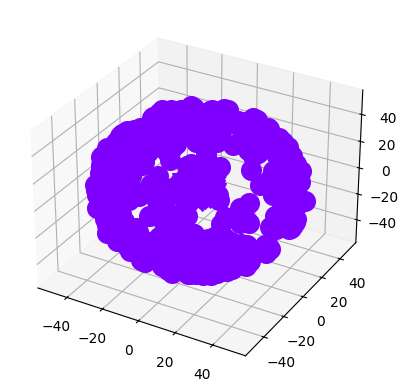

In [6]:
 def kMeans(K, Xs):
    (N, D) = Xs.shape
 
    centroids = np.zeros((K, D))
    clusters = np.zeros(N).astype("uint")

    # TODO: Cerința 1
    
    return clusters, centroids

clusters, centroids = kMeans(K, Xs)
plotClusters(Xs, labels, centroids, clusters)

2. [2 pct] Implementați metrica *Rand Index* descrisă în [Secțiunea 6.1] 



In [7]:
def randIndex(clusters, labels):
    
    # TODO: Cerința 2

    return 0.5

print("randIndex:", randIndex(clusters, labels))

randIndex: 0.5


3. [2 pct] Testați algoritmul implementat și eficiența acestuia pe seturile de date din arhivă. Puteți selecta alt set de date folosind *DATASET* din [Parametrii necesari rulării](#scrollTo=kVQscCaxXfvF).
    
    **Explicați de ce** pe unele seturi de date rezultatele sunt *nesatisfăcătoare*.


4. [2 pct] Implementați unul dintre cei doi algoritmi prezentați ı̂n Secțiunea 5:
  * metoda Kaufman pentru alegerea centroizilor inițiali
  * algoritmul K-Means++

    Comparați grupările obținute astfel cu cele obținute cu algoritmul K-Means.

    Este utilă inițializarea atentă a centroizilor?

In [8]:
# TODO

## 9. Set de Date
În cadrul acestui laborator veți folosi seturile de date [FCPS](https://github.com/cs-pub-ro/ML/raw/master/lab/lab1/FCPS.zip) (Fundamental Clustering
Problem Suite) ale Philipps Universität Marburg.

Pentru fiecare set de date veți găsi următoarele fișiere ı̂n subdirectorul 01FCPSdata:
* $<$nume$>$.lrn - setul de date cu un id pentru fiecare obiect,
* $<$nume$>$.cls - clasele reale ale obiectelor.

Coloanele sunt separate prin TAB.

# Bibliografie
<a name="M67">[1] *James MacQueen et al. Some methods for classification and analysis of multivariate observations. In Proceedings of the fifth Berkeley symposium on mathematical statistics and probability, volume 1, pages 281–297. California, USA, 1967*</a>

<a name="AV07">[2] *David Arthur and Sergei Vassilvitskii. k-means++: The advantages of careful seeding. In Proceedings of the eighteenth annual ACM-SIAM symposium on Discrete algorithms, pages 1027–1035. Society for Industrial and Applied Mathematics, 2007*</a>

<a name="PLL99">[3] *José Manuel Pena, Jose Antonio Lozano, and Pedro Larranaga. An empirical comparison of four initialization methods for the K-Means algorithm. Pattern recognition letters, 20(10):1027–1040, 1999*</a>
